In [6]:
import torch
from torch import nn
import torch.nn.functional as F
from PIL import Image
import sys, os
sys.path.append('./vit/')
from vit.model import build_model
import warnings 
warnings.filterwarnings("ignore")
from vit.utils import make_predictions

In [14]:
model = build_model(pretrained_weights='./vit/weights/models.pth', img_size=224, num_cls=6, quantized=False)
model = model.eval()
if torch.cuda.is_available(): model=model.cuda()

Take key encoder in provided checkpoint dict
Pretrained weights found at ./vit/weights/models.pth and loaded with msg: <All keys matched successfully>
pretrained weights loaded
vit_small adapter built. 0 trainable params, 21656833 frozen params.
Take key decoder in provided checkpoint dict
Pretrained weights found at ./vit/weights/models.pth and loaded with msg: <All keys matched successfully>
pretrained weights loaded
decoder adapter built. 0 trainable params, 9222 frozen params.


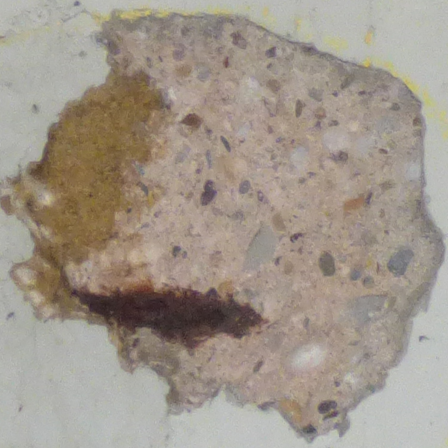

NoDamage       ........................................  0.01% 
Crack          ........................................  0.01% 
Spalling       +++++++++++++++++++++++++++++++++++++++. 99.66% 
Efflorescence  ........................................  0.00% 
BarsExposed    +++++++++++++++++++++++++++++++++++++++. 99.46% 
Rust           ++++++++++++++++++++++++++++++++++++.... 92.00% 
inference time = 313.11 ms


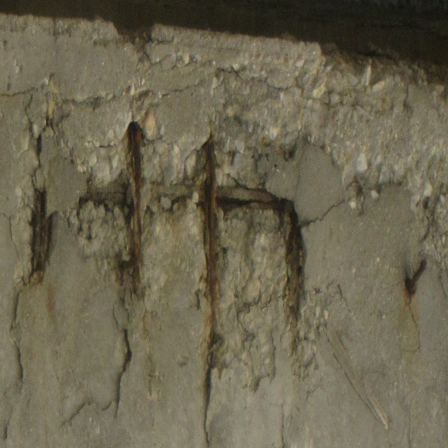

NoDamage       ........................................  0.00% 
Crack          ++......................................  6.06% 
Spalling       +++++++++++++++++++++++++++++++++++++++. 99.66% 
Efflorescence  ........................................  0.01% 
BarsExposed    +++++++++++++++++++++++++++++++++++++++.100.00% 
Rust           ++++++++++++++++++++++++++++++++++++++.. 96.13% 
inference time = 165.03 ms


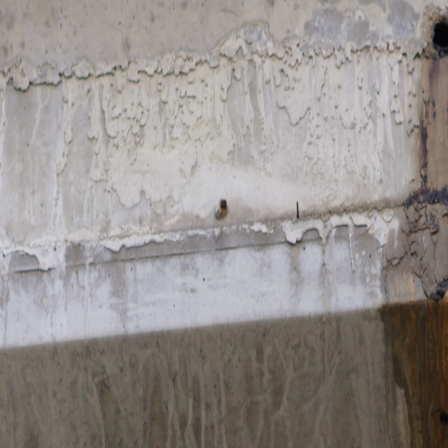

NoDamage       ++++++++++++++++++++++++++++++.......... 75.26% 
Crack          ........................................  0.00% 
Spalling       ........................................  0.10% 
Efflorescence  ........................................  0.03% 
BarsExposed    ........................................  0.00% 
Rust           ........................................  0.00% 
inference time = 205.85 ms


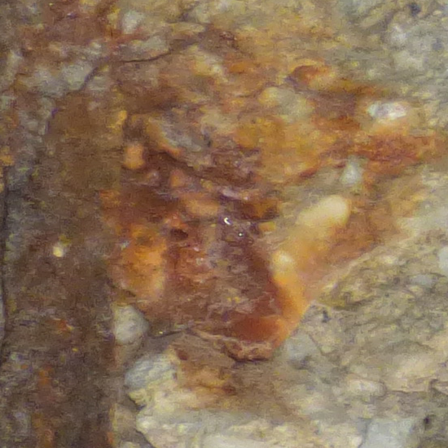

NoDamage       ........................................  0.00% 
Crack          ++++++.................................. 17.40% 
Spalling       ++++++++++++++++++++.................... 51.19% 
Efflorescence  ........................................  0.01% 
BarsExposed    ++++++++++++++++++...................... 46.29% 
Rust           +++++++++++++++++++++++++++++++++....... 83.54% 
inference time = 134.00 ms


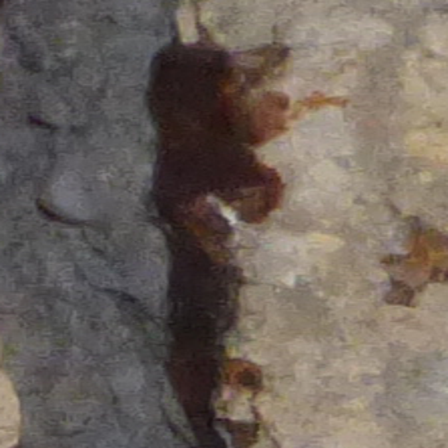

NoDamage       ........................................  0.00% 
Crack          +++++++++++++++++++++................... 54.15% 
Spalling       +++++++++++++++++++++++++++++++++++++... 94.19% 
Efflorescence  ........................................  0.69% 
BarsExposed    +++++++++++++++++++++++++++++++++++++++. 99.63% 
Rust           +++++++++++++++++++++++++............... 63.89% 
inference time = 148.11 ms


In [11]:
img_list_path = './datasets/data/'
img_list = [img_list_path +img_name for img_name in os.listdir(img_list_path)]
labels_list =  ['NoDamage' , 'Crack', 'Spalling', 'Efflorescence', 'BarsExposed', 'Rust']
for img_path in img_list:
    make_predictions(model, img_path, img_size=224, labels= labels_list)
   